In [1]:
#Image preprocessing steps that has to be done before using in CNN
#importing all packages
import matplotlib.pyplot as plt
import numpy as np
import glob

In [113]:
##applying the cut and checking whether the major part of the shower is inside the image 
#(both center of mass cut and size cut(correspond to an image only with the background with size: 2398)) 
filenames = glob.glob('./NOISE_DATA/blackout_block/9pe/gamma_bef/*.txt')#('./test_set_40pe/proton/*.txt')
filenames = filenames[0:3000]
a_min = 2398
for filename in filenames:
    #print(filename)
    x1, y1, a1 = np.loadtxt(fname=filename,delimiter=' ', unpack=True)
    xcog = (np.sum(a1*x1))/(np.sum(a1))
    ycog = (np.sum(a1*y1))/(np.sum(a1))
    size = np.sum(a1)
    #print(xcog)
    if np.absolute(xcog) < 0.8*np.max(x1) and np.absolute(ycog) < 0.8*np.max(y1) and size > a_min:
        np.savetxt('./{0:s}_cut.txt'.format(filename), np.c_[x1, y1, a1], delimiter= ' ', fmt ="%.3f %.3f %.3f")
    else:
        print('not in the cut')

In [114]:
##adding noise of different levels in ADC counts
filenames = glob.glob('./NOISE_DATA/blackout_block/9pe/gamma_bef/*_cut.txt')#('./test_set_40pe/proton/*_cut.txt')
filenames = filenames[0:3000]
#sigma = 64.28 ##-----------4.5pe(conversion=0.07)
sigma = 128.57 ##-------------9pe
#sigma = 285.71 ##----------------20 p.e
#sigma = 571.42 ##------------------40 pe
for filename in filenames:
    x2, y2, a2 = np.loadtxt(fname=filename,delimiter=' ', unpack=True)
    Ai = a2 + np.random.normal(0,sigma)
    np.savetxt('./{0:s}_40pe_noise.txt'.format(filename), np.c_[x2, y2, Ai], delimiter= ' ', fmt ="%.3f %.3f %.3f")
    #plt.hist(Ai)
    #plt.show()

In [115]:
##normalizing the data up to 0 to 1 which is necessary to be used in CNN
filenames = glob.glob('./NOISE_DATA/blackout_block/9pe/gamma_bef/*_noise.txt')#('./test_set_40pe/proton/*_noise.txt')
filenames = filenames[0:3000]
for filename in filenames:
    x3, y3, a3 = np.loadtxt(fname=filename,delimiter=' ', unpack=True)
    a33 = a3/np.max(a3)
    np.savetxt('./{0:s}_norm.txt'.format(filename), np.c_[x3, y3, a33], delimiter= ' ', fmt ="%.3f %.3f %.3f")

In [116]:
#Adding blackout pixels as a block randomly in the image (using pandas dropout)
import numpy as np
import pandas 
import random
filenames = glob.glob('./NOISE_DATA/blackout_block/9pe/gamma_bef/*_norm.txt')#('./test_set_40pe/proton/*_noise.txt')
filenames = filenames[0:3000]

for filename in filenames:
    n = random.randint(0, 2694)#(0,2693)
    #Adding blackout pixels
    df = pandas.read_table(filename, delim_whitespace=True, names=('X', 'Y', 'A'))
    #df1 = df.drop(df.index[9:19])
    df1 = df.drop(df.index[n:n+10])
    np.savetxt('./{0:s}_panda_block.txt'.format(filename), df1.values, fmt='%0.3f')

In [106]:
#Adding 10 blackout pixels randomly scattered (using pandas dropout)
#import numpy as np
#import pandas
#filenames = glob.glob('./NOISE_DATA/black_out_random/testset_9pe/proton_bef/*_norm.txt')#('./test_set_40pe/proton/*_noise.txt')
#filenames = filenames[0:3000]
#for filename in filenames:
#    #Adding blackout pixels
#    df = pandas.read_table(filename, delim_whitespace=True, names=('X', 'Y', 'A'))
#    df1 = df.drop(df.sample(n=10).index)
#    np.savetxt('./{0:s}_panda.txt'.format(filename), df1.values, fmt='%0.3f')

In [117]:
##sorting the images and saving it in the .npy format (so that the CNN sees the data as an image)
filenames = glob.glob('./NOISE_DATA/blackout_block/9pe/gamma_bef/*_block.txt')#('./test_set_40pe/proton/*_norm.txt')
filenames = filenames[0:3000]
for filename in filenames:
    x4, y4, a4 = np.loadtxt(fname=filename,delimiter=' ', unpack=True)
    x_vals, x_idx = np.unique(x4, return_inverse=True)
    y_vals, y_idx = np.unique(y4, return_inverse=True)
    vals_array = np.empty([52,52])
    vals_array[x_idx, y_idx] = a4
    zz = np.array(vals_array, dtype=np.float32)
    zz1 = np.matrix(zz)
    #print(zz1)
    #print(zz1.shape)
    np.save('./{0:s}.npy'.format(filename), np.c_[zz1])

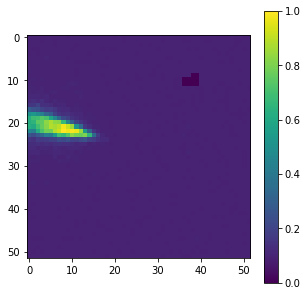

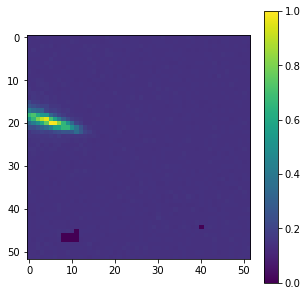

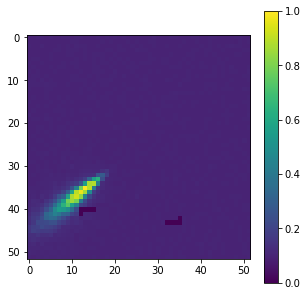

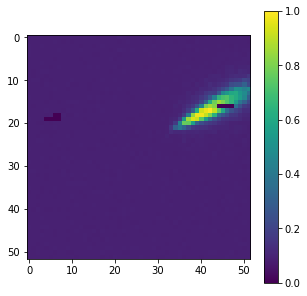

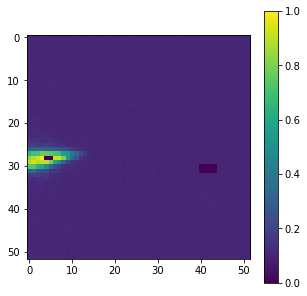

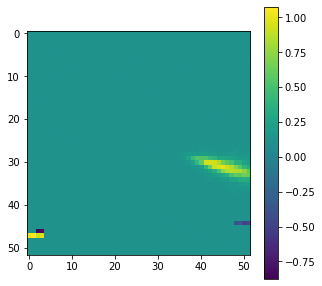

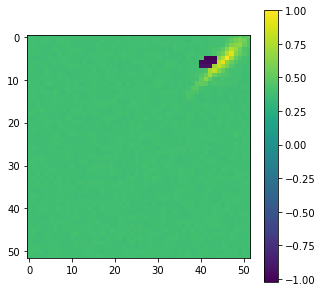

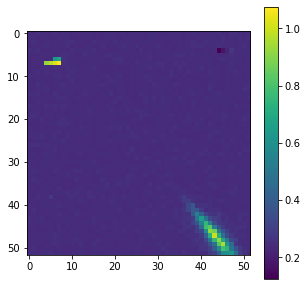

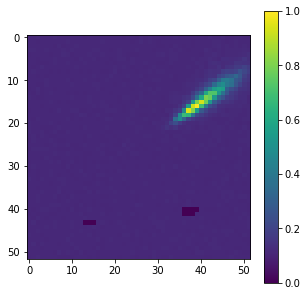

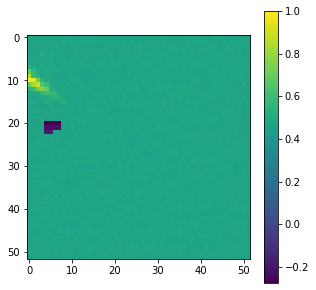

In [7]:
##viewing images altogether to see the above applied specifications has been applied or not
import glob
import numpy
import matplotlib.pyplot as plt
from matplotlib import colors

filenames = glob.glob('./NOISE_DATA/blackout_block/9pe/gamma_before/*.npy')#('./without_noise_ring/*.npy')
filenames = filenames[0:10]
cmap = plt.cm.get_cmap('viridis')
for filename in filenames:
    #print(filename)
    data = np.load(filename)
    #print(data)
    fig = plt.figure(figsize=(5, 5))
    
    plt.imshow(data, cmap=cmap)
    plt.colorbar()
    #plt.savefig('./{0:s}.png'.format(filename))#, np.c_data)